#**Challenge: robot de trading**

#**1. Configuración del ambiente**

In [1]:
global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision

In [2]:
#Pandas | numpy | matplotlib 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Web scraping | Beautiful soup
from bs4 import BeautifulSoup
import requests
import html5lib
from urllib.request import urlopen
# Libreria gestion financiera yf
import yfinance as yf
# Libreria gestion tiempo
from datetime import datetime



#**2. Obtención de datos**

* yfinance de Python para extraer el histórico de precios del Bitcoin en dólares 
BTC-USD
* Histórico de los últimos 7 días en intervalos de 5 minutos guardarlo en el dataframe df_bitcoin.


In [3]:
def importar_base_bitcoin():
  global df_bitcoin
  df_bitcoin = yf.download(tickers = "BTC-USD", period = "7d", interval = "5m")

In [4]:
importar_base_bitcoin()

[*********************100%***********************]  1 of 1 completed


In [5]:
df_bitcoin

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-05-26 00:00:00+00:00,26474.181641,26486.089844,26474.181641,26481.548828,26481.548828,0
2023-05-26 00:05:00+00:00,26481.531250,26481.531250,26460.160156,26460.160156,26460.160156,0
2023-05-26 00:10:00+00:00,26450.755859,26457.359375,26444.072266,26457.144531,26457.144531,0
2023-05-26 00:15:00+00:00,26455.166016,26466.228516,26455.166016,26466.228516,26466.228516,4686848
2023-05-26 00:20:00+00:00,26464.923828,26498.097656,26464.923828,26498.097656,26498.097656,0
...,...,...,...,...,...,...
2023-06-01 14:10:00+00:00,26928.466797,26946.539062,26925.947266,26946.539062,26946.539062,14536704
2023-06-01 14:15:00+00:00,26939.126953,26939.126953,26884.835938,26884.835938,26884.835938,6657024
2023-06-01 14:20:00+00:00,26870.519531,26881.246094,26856.595703,26856.595703,26856.595703,0


In [6]:
df_bitcoin.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1.903000e+03
mean,27221.070410,27230.687118,27211.778470,27221.491367,27221.491367,1.379149e+07
std,508.636596,510.530370,506.431428,508.209146,508.209146,3.187878e+07
min,26347.062500,26352.207031,26343.949219,26343.949219,26343.949219,0.000000e+00
25%,26768.326172,26774.188477,26762.136719,26768.954102,26768.954102,0.000000e+00
50%,27141.671875,27153.996094,27135.201172,27142.560547,27142.560547,8.007680e+05
75%,27718.114258,27726.452148,27706.318359,27719.817383,27719.817383,1.497805e+07
max,28432.039062,28432.039062,28361.986328,28418.039062,28418.039062,3.924695e+08


* BeautifulSoup Web Scraping
* Página https://coinmarketcap.com/ para:
 * extraer el precio actual del Bitcoin BTC en dólares USD
 * variación de su precio en la última hora 1h % . 
* Precio convertir a float en variable llamada precio_actual. 
* En la variable tendencia guardar el valor:
 * 'baja' si la variación del precio es negativa
 *  'alta' si la variación del precio es positiva.






In [74]:
def extraer_tendencias():
    global precio_actual,tendencia  #Globales
    #Direccion url de la pagina de precios de BTC
    url = 'https://coinmarketcap.com/'
    page = requests.get(url)
    soup = BeautifulSoup(page.content,'html.parser')
    #Manejo de la tabla con los datos
    tabla_monedas= soup.find_all('table',class_='sc-beb003d5-3 ieTeVa cmc-table')[0]  
    tr1=tabla_monedas.find_all('tr')[1] 
    tedes=tr1.find_all('td')
    precio_btc_td=tedes[3].get_text().replace('$','').replace(",", "")
    precio_actual= float(str(precio_btc_td))
    #Tendencia
    #Ubico la tendencia en base al tipo de icono que hay en la etiqueta span en la lista de los TD
    tend_span=tedes[4].find_all('span')
    #La tendencia de 1hora esta en el segundo span y en el TD 4to de la lista
    tipo_tend=tedes[4].find_all('span')[1].attrs
    #Toma un diccionario y clasifica segun los criterios la tendencia al alza o a la baja
    #icon-Caret-down | Tendencia a la baja
    #icon-Caret-up | Tendencia al alza
    if tipo_tend['class'][0] == 'icon-Caret-up':
      tendencia = 'alta'
    elif tipo_tend['class'][0] == 'icon-Caret-down':
      tendencia = 'baja'
    else:
      tendencia = 'desconocido'

    return [precio_actual, tendencia]

In [8]:
extraer_tendencias()

[26874.65, 'baja']

#**3. Limpieza de datos**

In [9]:
def limpieza_datos():
    global df_bitcoin_limpio, media_bitcoin #Globales
    # Copio el DataFrame de bitcoin sin alterar el original con metodo copy
    df_bitcoin_limpio = df_bitcoin.copy()
    #Identifico duplicados si es que los hay
    iduplic=df_bitcoin_limpio.index.duplicated()
    #Me quedo con el dataframe con los valores que NO estan duplicados.
    df_bitcoin_limpio = df_bitcoin_limpio[~iduplic]
    #Busco valores Nan de la columna Close y los actualizo a cero con fillna e inplace true 
    df_bitcoin_limpio['Close'].fillna(0,inplace=True)
    #Verificacion de registros con volumen positivo
    vol_posit=(df_bitcoin_limpio['Volume']>0)
    # Filtrado con el criterio de vol positivo
    df_bitcoin_limpio=df_bitcoin_limpio[vol_posit]
    #Limites del boxplot
    precio_inter=df_bitcoin_limpio['Close']
    Q1=precio_inter.quantile(0.25)
    Q3=precio_inter.quantile(0.75)
    #Criterio de filtro dentro del intervalo
    filtro_IIQ= (precio_inter >= Q1) & (precio_inter <= Q3)
    #Filtrado con criterio dentro del intervalo
    df_bitcoin_limpio=df_bitcoin_limpio[filtro_IIQ]
    #Calculo de la media
    media_bitcoin = df_bitcoin_limpio['Close'].mean().round(2)


In [10]:
limpieza_datos()

In [11]:
df_bitcoin_limpio.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2023-05-28 00:40:00+00:00 to 2023-06-01 14:10:00+00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       500 non-null    float64
 1   High       500 non-null    float64
 2   Low        500 non-null    float64
 3   Close      500 non-null    float64
 4   Adj Close  500 non-null    float64
 5   Volume     500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.3 KB


In [12]:
media_bitcoin

27282.55

#**4. Tomar decisiones**

In [13]:
def tomar_decisiones():
  global algoritmo_decision, precio_actual,tendencia #Globales

  if precio_actual >= media_bitcoin and tendencia == 'baja':
    algoritmo_decision = 'Vender'
  elif precio_actual < media_bitcoin and tendencia == 'alta':
    algoritmo_decision = 'Comprar'
  else:
    algoritmo_decision = 'Neutral'

  return algoritmo_decision




In [14]:
algoritmo_decision=tomar_decisiones()
print("Criterio del Robot:")
print("------------------------")
print("Si el precio actual es mayor/igual que el precio promedio y la tendencia es de baja ---> ‘Vender’")
print("Si el precio actual es menor que el precio promedio y la tendencia es de alta ---> ‘Comprar’.")
print("\n")
print("Resultado del Robot de trading:")
print("--------------------------------")
print(f"El precio actual es: {precio_actual} . La media es {media_bitcoin} . La tendencia es: {tendencia}")
print(f"la recomendacion del robot es {algoritmo_decision}")
print("\n")

Criterio del Robot:
------------------------
Si el precio actual es mayor/igual que el precio promedio y la tendencia es de baja ---> ‘Vender’
Si el precio actual es menor que el precio promedio y la tendencia es de alta ---> ‘Comprar’.


Resultado del Robot de trading:
--------------------------------
El precio actual es: 26874.65 . La media es 27282.55 . La tendencia es: baja
la recomendacion del robot es Neutral




# 5. Visualizacion


In [68]:
def visualizacion():
  global df_bitcoin, algoritmo_decision, precio_actual,tendencia, media_bitcoin #Globales
  #Nueva columna promedio al df_bitcoin
  print(media_bitcoin)
  df_bitcoin['Promedio']=media_bitcoin
  # Config gráfico
  fig = plt.figure(figsize=(16, 5))
  #Titulo
  plt.title('Precio Bitcoin a 7 dias. c/5 minutos',fontsize=14)
  #Escondo los ejes de la figura 
  plt.xticks([])
  plt.yticks([])
  ax = fig.add_subplot(1, 1, 1)
  # Labels
  ax.set_xlabel('Fecha ', fontsize=12)
  ax.set_ylabel('Precio Bitcoin', fontsize=12)
  # PLot
  ax.plot(df_bitcoin.index, df_bitcoin["Close"], label='Precio BTC')
  # Linea de Promedio
  ax.plot(df_bitcoin.index, df_bitcoin["Promedio"], label='Línea de promedio')
  # Leyenda
  ax.legend(loc='upper left', prop={'size': 8, 'weight': 'bold'})
  # Decision con annotate
  plt.annotate(algoritmo_decision, xy=(df_bitcoin.index[-1], df_bitcoin["Close"][-1]),
                 xytext=(df_bitcoin.index[-100], df_bitcoin["Close"].min()),
                 arrowprops=dict(facecolor='blue', width = 0.4, headwidth = 8, shrink=0.07))
  # Mostrar el gráfico
  plt.show()


27282.55


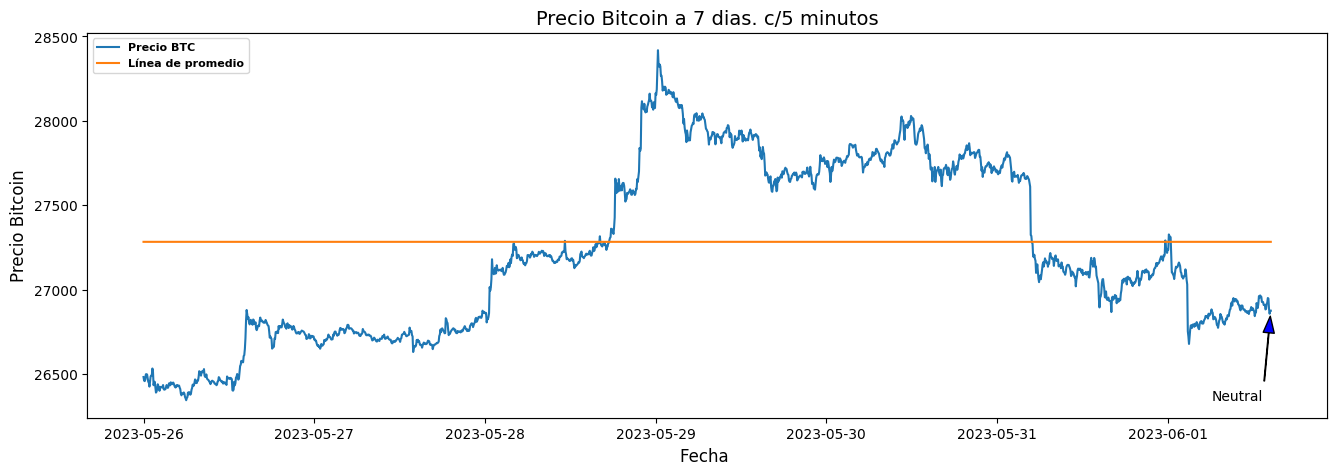

In [69]:
visualizacion()

#6-Automatizacion

[*********************100%***********************]  1 of 1 completed
27300.8


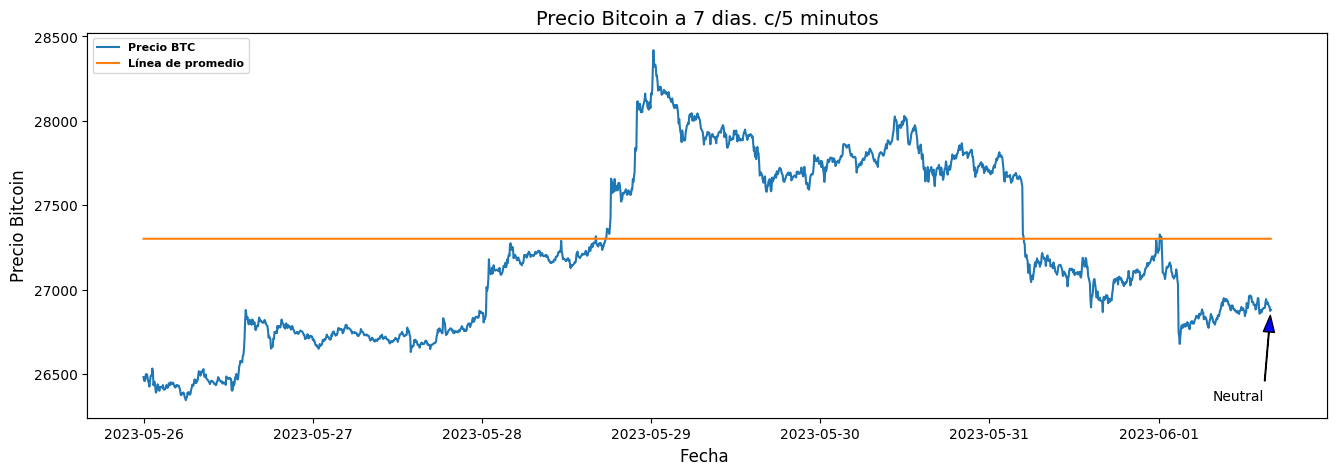

KeyboardInterrupt: ignored

In [73]:
from IPython.display import clear_output
import time

while(True):
  clear_output()
  importar_base_bitcoin()
  extraer_tendencias()
  limpieza_datos()
  tomar_decisiones()
  visualizacion()
  time.sleep(300)